# Interactive Visualization Lab

Complete the following set of exercises to solidify your knowledge of interactive visualization using Plotly, Cufflinks, and IPyWidgets.

In [74]:
import pandas as pd
import numpy as np
import plotly as py
import cufflinks as cf
from ipywidgets import interact, widgets
import datetime
from datetime import date
import plotly.express as px

cf.go_offline()

In [3]:
data = pd.read_excel('../data/Online Retail.xlsx')

In [4]:
data

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Revenue,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom
1,536373,2010-12-01 09:02:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom
2,536375,2010-12-01 09:32:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom
3,536390,2010-12-01 10:19:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,64,2.55,163.20,17511,United Kingdom
4,536394,2010-12-01 10:39:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,32,2.55,81.60,13408,United Kingdom
...,...,...,...,...,...,...,...,...,...
396029,580691,2011-12-05 15:48:00,90214W,"LETTER ""W"" BLING KEY RING",12,0.29,3.48,13790,United Kingdom
396030,580691,2011-12-05 15:48:00,90214Z,"LETTER ""Z"" BLING KEY RING",12,0.29,3.48,13790,United Kingdom
396031,580865,2011-12-06 11:58:00,90089,PINK CRYSTAL SKULL PHONE CHARM,12,0.19,2.28,17914,United Kingdom
396032,580865,2011-12-06 11:58:00,90089,PINK CRYSTAL SKULL PHONE CHARM,12,0.19,2.28,17914,United Kingdom


In [5]:
data.columns

Index(['InvoiceNo', 'InvoiceDate', 'StockCode', 'Description', 'Quantity',
       'UnitPrice', 'Revenue', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
data['Year']=pd.DatetimeIndex(data['InvoiceDate']).year
data['Month']=pd.DatetimeIndex(data['InvoiceDate']).month
print(data.head())

   InvoiceNo         InvoiceDate StockCode  \
0     536365 2010-12-01 08:26:00    85123A   
1     536373 2010-12-01 09:02:00    85123A   
2     536375 2010-12-01 09:32:00    85123A   
3     536390 2010-12-01 10:19:00    85123A   
4     536394 2010-12-01 10:39:00    85123A   

                          Description  Quantity  UnitPrice  Revenue  \
0  CREAM HANGING HEART T-LIGHT HOLDER         6       2.55     15.3   
1  CREAM HANGING HEART T-LIGHT HOLDER         6       2.55     15.3   
2  CREAM HANGING HEART T-LIGHT HOLDER         6       2.55     15.3   
3  CREAM HANGING HEART T-LIGHT HOLDER        64       2.55    163.2   
4  CREAM HANGING HEART T-LIGHT HOLDER        32       2.55     81.6   

   CustomerID         Country  Year  Month  
0       17850  United Kingdom  2010     12  
1       17850  United Kingdom  2010     12  
2       17850  United Kingdom  2010     12  
3       17511  United Kingdom  2010     12  
4       13408  United Kingdom  2010     12  


## 1. Create an interactive bar chart showing total quantity and revenue by country (excluding United Kingdom) for the month of April 2011.

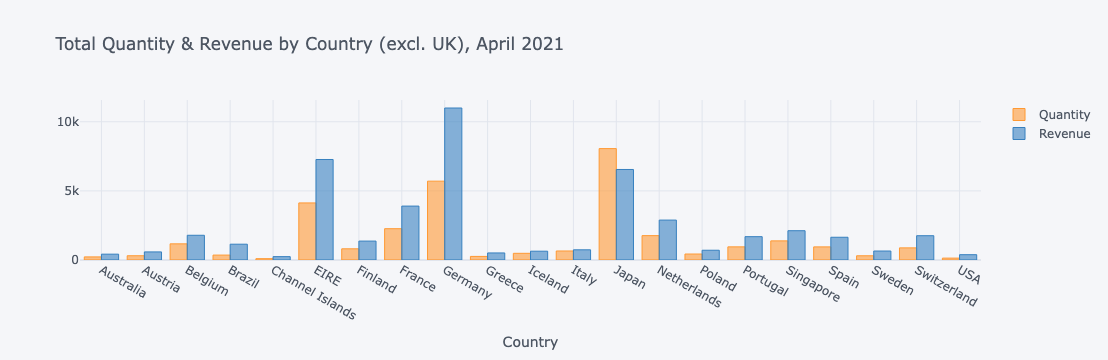

In [14]:
data_noUK = data[data["Country"] != "United Kingdom"]
data_april_noUK = data_noUK[(data_noUK["Year"] == 2011) & (data_noUK["Month"] == 4)]
grouped_data = data_april_noUK.groupby("Country")[["Quantity", "Revenue"]].sum().reset_index()

grouped_data.iplot(kind='bar', x='Country', y=['Quantity', 'Revenue'], title="Total Quantity & Revenue by Country (excl. UK), April 2021", xTitle='Country')

## 2. Create an interactive line chart showing quantity and revenue sold to France between January 1st and May 31st 2011.

/opt/anaconda3/lib/python3.12/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



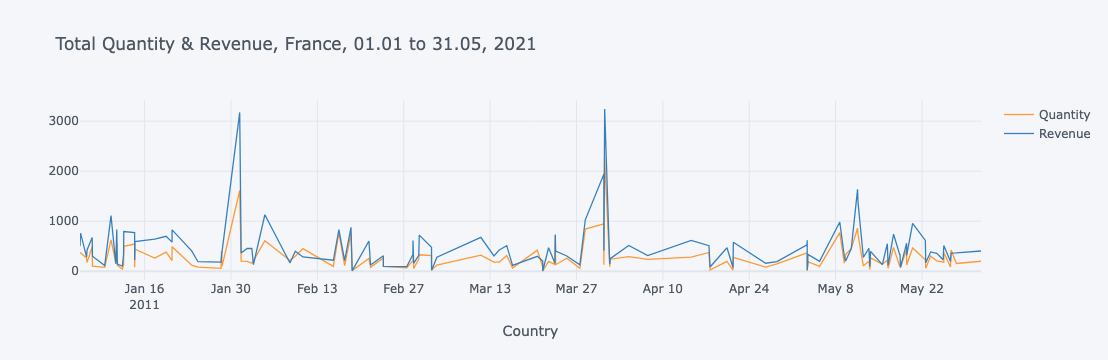

In [17]:
data_france = data[data["Country"] == "France"]
data_france_01to05_2021 = data_france[(data_france["Year"] == 2011) & (data_france["Month"].between(1, 5))]
grouped_france = data_france_01to05_2021.groupby("InvoiceDate")[["Quantity", "Revenue"]].sum().reset_index()

grouped_france.iplot(kind='line', x='InvoiceDate', y=['Quantity', 'Revenue'], title="Total Quantity & Revenue, France, 01.01 to 31.05, 2021", xTitle='Country')

## 3. Create an interactive scatter plot showing the relationship between average quantity (x-axis) and average unit price (y-axis) for the product PARTY BUNTING with the plot points color-coded by country (categories).

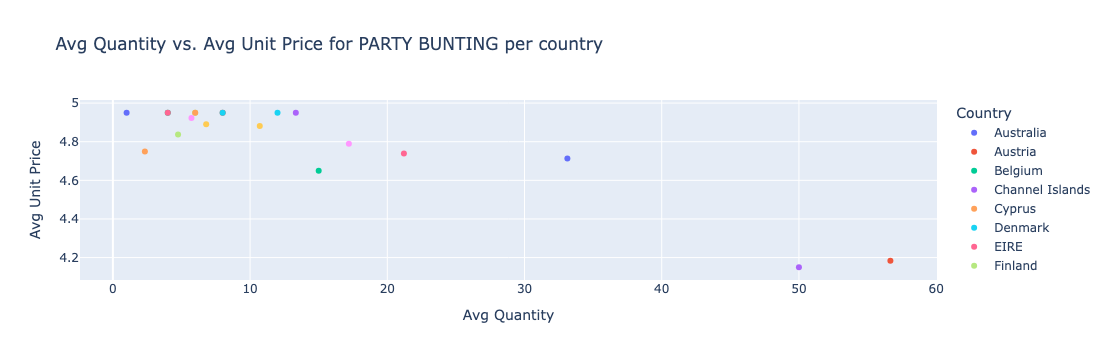

In [31]:
data_party = data[data["Description"] == "PARTY BUNTING"]
grouped_data_party = data_party.groupby("Country")[["Quantity", "UnitPrice"]].mean().reset_index()


fig = px.scatter(grouped_data_party, x='Quantity', y='UnitPrice', color='Country',
                 title='Avg Quantity vs. Avg Unit Price for PARTY BUNTING per country',
                 labels={'Quantity': 'Avg Quantity', 'UnitPrice': 'Avg Unit Price'},
                 hover_data=['Country'])
fig.show()

## 4. Create a set of interactive histograms showing the distributions of quantity per invoice for the following countries: EIRE, Germany, France, and Netherlands.

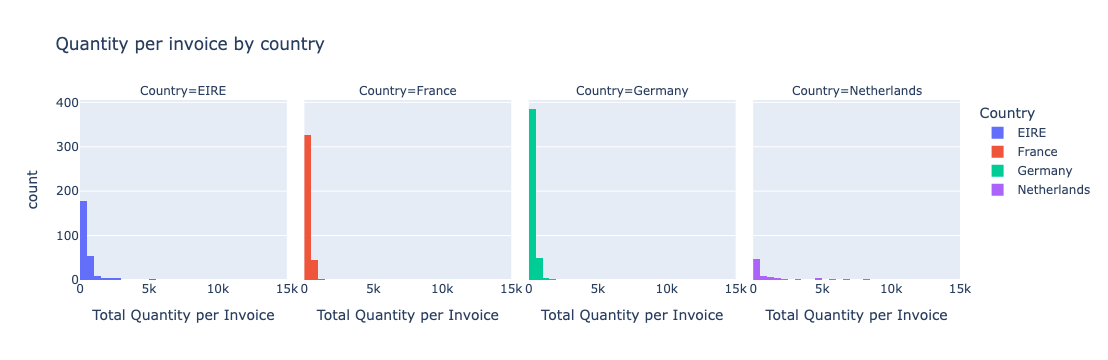

In [37]:
data_countries = data[data["Country"].isin(["EIRE", "Germany", "France", "Netherlands"])]
grouped_data_countries = data_countries.groupby(["Country", "InvoiceNo"])["Quantity"].sum().reset_index()


fig = px.histogram(grouped_data_countries, x='Quantity', nbins=30, color='Country',
                   facet_col='Country',  
                   title='Quantity per invoice by country',
                   labels={'Quantity': 'Total Quantity per Invoice'})
fig.show()

## 5. Create an interactive side-by-side bar chart showing the revenue by country listed below (bars) for each of the products listed below.

In [40]:
product_list = ['JUMBO BAG RED RETROSPOT', 
                'CREAM HANGING HEART T-LIGHT HOLDER',
                'REGENCY CAKESTAND 3 TIER']

country_list = ['EIRE', 'Germany', 'France', 'Netherlands']

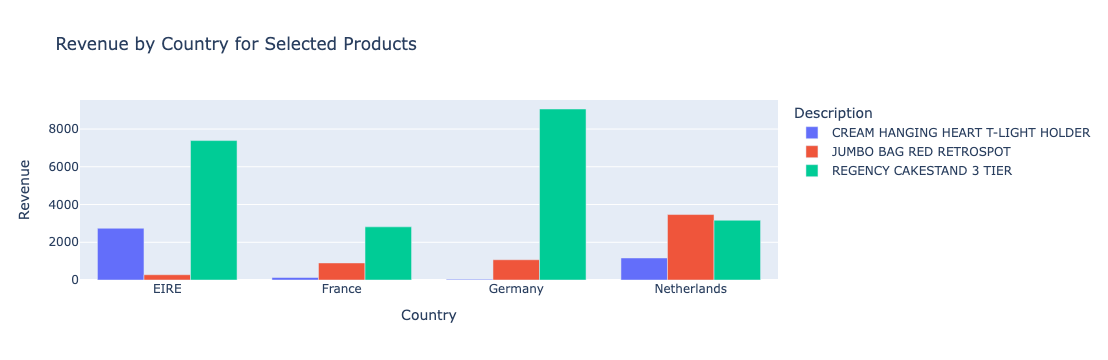

In [41]:
data_product_country = data[data['Description'].isin(product_list) & data['Country'].isin(country_list)]
grouped_data_product_country = data_product_country.groupby(['Country', 'Description'])['Revenue'].sum().reset_index()


fig = px.bar(grouped_data_product_country, x='Country', y='Revenue', color='Description', 
             barmode='group', 
             title='Revenue by Country for Selected Products')
fig.show()

## 6. Create an interactive line chart showing quantity sold by day for the United Kingdom. Add drop-down boxes for Year and Month that allow you to filter the date range that appears in the chart.

In [42]:
data['Day'] = pd.DatetimeIndex(data['InvoiceDate']).day
uk = data[data['Country']=='United Kingdom']

## 7. Create an interactive scatter plot that plots number of invoices (x-axis) vs. number of customers (y-axis) and the plot points represent individual products. Add two sliders that control the x and y axis ranges.

In [ ]:
agg_func = {'InvoiceNo':'nunique',
            'Quantity':'sum',
            'UnitPrice':'mean',
            'Revenue':'sum',
            'CustomerID':'nunique'}

products = uk.groupby('Description').agg(agg_func)

## 8. Creat an interactive bar chart that shows revenue by product description. Add a text field widget that filters the results to show the product that contain the text entered in their description.